In [ ]:
Modelin Açıklama Gücü 

Eğitim seti R^2 skoru: 0.7597598292034167
Test seti R^2 skoru: 0.6521157503858558


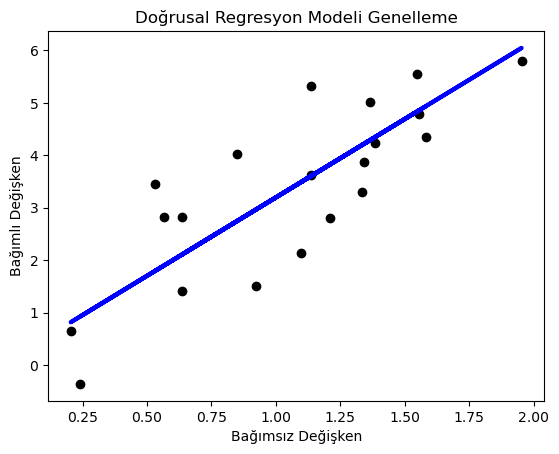

In [1]:
# Gerekli kütüphaneleri içe aktarın
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini oluşturun
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

# Veri setini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doğrusal regresyon modelini oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

# Eğitim seti üzerinde tahmin yapın
y_train_pred = model.predict(X_train)

# Test seti üzerinde tahmin yapın
y_test_pred = model.predict(X_test)

# Modelin performansını değerlendirin
print('Eğitim seti R^2 skoru:', r2_score(y_train, y_train_pred))
print('Test seti R^2 skoru:', r2_score(y_test, y_test_pred))

# Modelin genellemesini görselleştirin
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.xlabel('Bağımsız Değişken')
plt.ylabel('Bağımlı Değişken')
plt.title('Doğrusal Regresyon Modeli Genelleme')
plt.show()


In [ ]:
# T Testi

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Örnek veri oluşturma
np.random.seed(0)
X = np.random.rand(100, 1)  # Bağımsız değişken
y = 2 * X + np.random.randn(100, 1)  # Bağımlı değişken

# Doğrusal regresyon modelini oluşturma
X_with_const = sm.add_constant(X)  # Sabit terimi eklemek
model = sm.OLS(y, X_with_const).fit()  # Doğrusal regresyon modelini tahmin etme
print(model.summary())  # Model özetini yazdırma

# T-testi yapma
t_value = model.tvalues[1]  # İkinci katsayının T değerini alır
p_value = model.pvalues[1]  # İkinci katsayının p değerini alır

print(f"T Değeri: {t_value}")
print(f"P Değeri: {p_value}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     30.79
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.45e-07
Time:                        15:17:46   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2222      0.193      1.149      0.2

In [ ]:
""""
Doğrusal regresyon modelinde, bir katsayının anlamlılığını değerlendirmek için T-testi kullanılabilir. 

Özellikle, bir bağımsız değişkenin etkisi üzerindeki katsayının istatistiksel olarak anlamlı olup olmadığını 
belirlemek için kullanılır. Bu test, katsayının sıfırdan farklı olup olmadığını değerlendirir.

T-testi, genellikle katsayının tahmini standart hata ve serbestlik derecesine dayalı bir T istatistiği
hesaplanarak gerçekleştirilir. Bu istatistik, katsayının tahmini değeri ile sıfır arasındaki farkın standart 
hata ile normalize edilmiş halidir. Elde edilen T değeri, kritik T değerleri veya p-değerleri ile karşılaştırılarak
katsayının istatistiksel olarak anlamlı olup olmadığı belirlenir.

Doğrusal regresyon modelinde, bir bağımsız değişkenin katsayısının T-testi şu adımlarla gerçekleştirilir:

1. Doğrusal regresyon modeli tahmin edilir.
2. İlgili bağımsız değişkenin katsayısı ve tahmini standart hatası elde edilir.
3. Katsayının T değeri hesaplanır.
4. Elde edilen T değeri, serbestlik derecesi ve istenilen anlamlılık düzeyi (genellikle %95 veya %99) kullanılarak kritik T değeri ile karşılaştırılır.
5. Hesaplanan T değeri, kritik T değerinden büyükse veya p-değeri istenilen anlamlılık düzeyinden küçükse, katsayı istatistiksel olarak anlamlı kabul edilir.

Bu şekilde, T-testi kullanılarak doğrusal regresyon modelindeki katsayıların anlamlılığı değerlendirilebilir.


"""

In [4]:
#Güven Aralıkları ve Önsav Sınamaları
#Anakütle Regresyon Eğiminin Sınanması

In [3]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Örnek veri oluşturma
np.random.seed(0)
X = np.random.rand(100, 1)  # Bağımsız değişken
y = 2 * X.squeeze() + np.random.randn(100)  # Bağımlı değişken

# Modeli oluşturma
X_with_intercept = sm.add_constant(X)  # Sabit terimi ekleyerek
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Regresyon eğim katsayısını ve p-değerini alarak t-testi yapma
slope, intercept = results.params[1], results.params[0]
t_statistic, p_value = results.tvalues[1], results.pvalues[1]

# Sonuçları yazdırma
print("Eğim Katsayısı:", slope)
print("T-istatistiği:", t_statistic)
print("p-değeri:", p_value)

# H0 hipotezi: Eğim katsayısı sıfırdır
alpha = 0.05  # Anlamlılık düzeyi
if p_value < alpha:
    print("Hipotez reddedildi: Eğim katsayısı istatistiksel olarak anlamlıdır.")
else:
    print("Hipotez kabul edildi: Eğim katsayısı istatistiksel olarak anlamlı değildir.")


Eğim Katsayısı: 1.9369350214020389
T-istatistiği: 5.549109761872248
p-değeri: 2.4461286098878816e-07
Hipotez reddedildi: Eğim katsayısı istatistiksel olarak anlamlıdır.


In [5]:
import numpy as np

# Örnek veri seti
y = np.array([2, 4, 5, 4, 6, 8])
y_hat = np.array([1, 3, 5, 4, 7, 9])
y_mean = np.mean(y)

# SST (Total Sum of Squares)
SST = np.sum((y - y_mean)**2)

# SSR (Sum of Squares due to Regression)
SSR = np.sum((y_hat - y_mean)**2)

# SSE (Sum of Squares due to Error)
SSE = np.sum((y - y_hat)**2)

print("SST (Total Sum of Squares):", SST)
print("SSR (Sum of Squares due to Regression):", SSR)
print("SSE (Sum of Squares due to Error):", SSE)


SST (Total Sum of Squares): 20.833333333333336
SSR (Sum of Squares due to Regression): 40.833333333333336
SSE (Sum of Squares due to Error): 4
